In [32]:
import pandas as pd
from pandas import api
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
# from google.colab import drive
# drive.mount('/content/drive')

In [34]:
dfPollution = pd.read_csv('global air pollution dataset.csv', delimiter = ',', encoding ='UTF-8')
dfPopulation = pd.read_csv('urbanandruralpopulation new.csv', delimiter = ',', encoding ='UTF-8')

In [35]:
# Rename columns to match for merging
dfPopulation.rename(columns={'country': 'Country', 'Year': 'year'}, inplace=True)

# Merge datasets
merged_data = pd.merge(dfPollution, dfPopulation, how='inner', on=['Country'])
print(merged_data)
merged_data.isna().sum()

          Country              City  AQI Value AQI Category  CO AQI Value  \
0          Brazil  Presidente Dutra         41         Good             1   
1          Brazil  Presidente Dutra         41         Good             1   
2          Brazil  Presidente Dutra         41         Good             1   
3          Brazil  Presidente Dutra         41         Good             1   
4          Brazil  Presidente Dutra         41         Good             1   
...           ...               ...        ...          ...           ...   
1096589  Malaysia            Marang         70     Moderate             1   
1096590  Malaysia            Marang         70     Moderate             1   
1096591  Malaysia            Marang         70     Moderate             1   
1096592  Malaysia            Marang         70     Moderate             1   
1096593  Malaysia            Marang         70     Moderate             1   

        CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value 

Country                0
City                  62
AQI Value              0
AQI Category           0
CO AQI Value           0
CO AQI Category        0
Ozone AQI Value        0
Ozone AQI Category     0
NO2 AQI Value          0
NO2 AQI Category       0
PM2.5 AQI Value        0
PM2.5 AQI Category     0
Code country           0
year                   0
Urban population       0
Rural population       0
dtype: int64

In [36]:
def iterative_pct_change(group, column_name):
    """
    Calculate percentage change iteratively for a specific column within each group.
    """
    changes = []
    previous_value = None

    for value in group[column_name]:
        if previous_value is None:
            changes.append(float('nan'))  # No change for the first element
        else:
            pct_change = (value - previous_value) / previous_value
            changes.append(pct_change)
        previous_value = value

    return pd.Series(changes, index=group.index)

In [37]:
# Convert population columns to numeric
merged_data['Urban population'] = pd.to_numeric(merged_data['Urban population'], errors='coerce')
merged_data['Rural population'] = pd.to_numeric(merged_data['Rural population'], errors='coerce')

# def iterative_pct_change(group, column_name):
#     """
#     Calculate percentage change iteratively for a specific column within each group.
#     """
#     changes = []
#     previous_value = None

#     for value in group[column_name]:
#         if previous_value is None:
#             changes.append(float('nan'))  # No change for the first element
#         else:
#             pct_change = (value - previous_value) / previous_value
#             changes.append(pct_change)
#         previous_value = value

#     return pd.Series(changes, index=group.index)

# Calculate population growth rate
merged_data['Urban Growth Rate'] = merged_data.groupby('City')['Urban population'].pct_change()
merged_data['Rural Growth Rate'] = merged_data.groupby('City')['Rural population'].pct_change()

# Drop rows with NaN values generated by pct_change
merged_data.dropna(inplace=True)

# Display the merged dataset with growth rates
print(merged_data)
merged_data.isna().sum()

          Country              City  AQI Value AQI Category  CO AQI Value  \
1          Brazil  Presidente Dutra         41         Good             1   
2          Brazil  Presidente Dutra         41         Good             1   
3          Brazil  Presidente Dutra         41         Good             1   
4          Brazil  Presidente Dutra         41         Good             1   
5          Brazil  Presidente Dutra         41         Good             1   
...           ...               ...        ...          ...           ...   
1096589  Malaysia            Marang         70     Moderate             1   
1096590  Malaysia            Marang         70     Moderate             1   
1096591  Malaysia            Marang         70     Moderate             1   
1096592  Malaysia            Marang         70     Moderate             1   
1096593  Malaysia            Marang         70     Moderate             1   

        CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value 

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
Code country          0
year                  0
Urban population      0
Rural population      0
Urban Growth Rate     0
Rural Growth Rate     0
dtype: int64

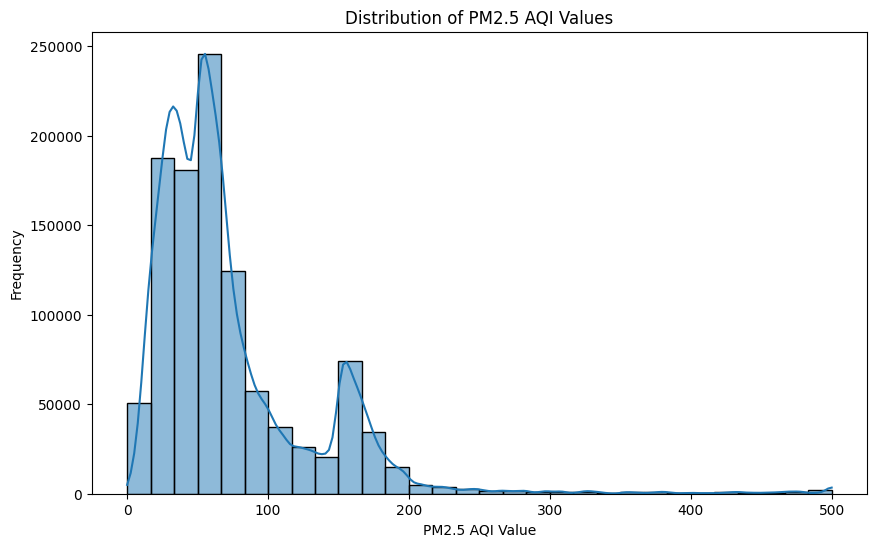

In [38]:
# Visualization of the dataset's PM2.5 AQI Values
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['PM2.5 AQI Value'], bins=30, kde=True)
plt.title('Distribution of PM2.5 AQI Values')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('Frequency')
plt.show()

In [39]:
# merged_data.to_csv('merged_output.csv', index=False)

In [40]:
features = ['Urban population', 'Rural population', 'Urban Growth Rate', 'Rural Growth Rate']
target = 'PM2.5 AQI Value'

X = merged_data[features]
y = merged_data[target]

In [41]:
# gendermap = {'Moderate':2, 'Good': 1, 'Unhealthy': 0}
# y = y.map(gendermap)

In [42]:
# # Check for NaNs and infinite values in X
# X.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
# X.dropna(inplace=True)
# y = y[X.index]
# y.dropna(inplace=True)

# print(X.isnull().sum())
# print(y.isnull().sum())

# print(f'Shape of X: {X.shape}')
# print(f'Length of y: {len(y)}')

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 49.15327013714817
MAE: 31.966889966384443
R-squared: 0.3195135124748991


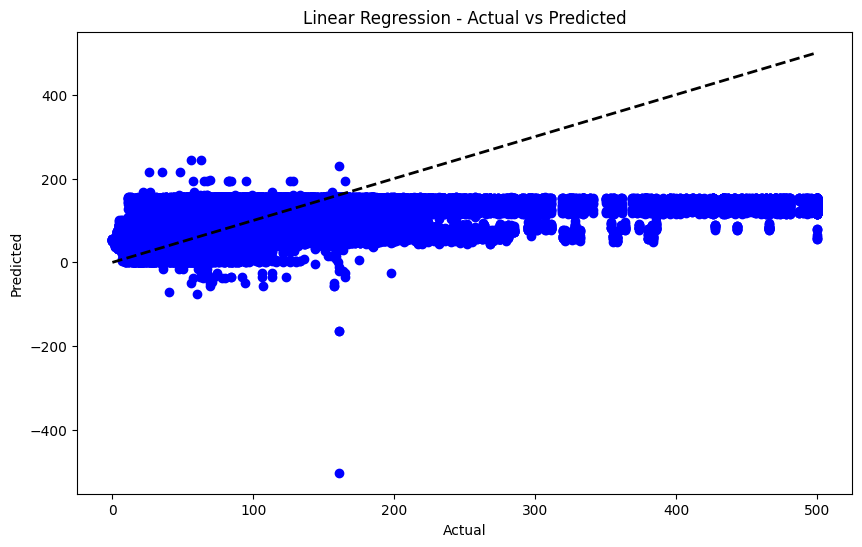

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = linear_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')


# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression - Actual vs Predicted')
plt.show()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.32642e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 49.153247144953376
MAE: 31.96283707236189
R-squared: 0.31951414909069986


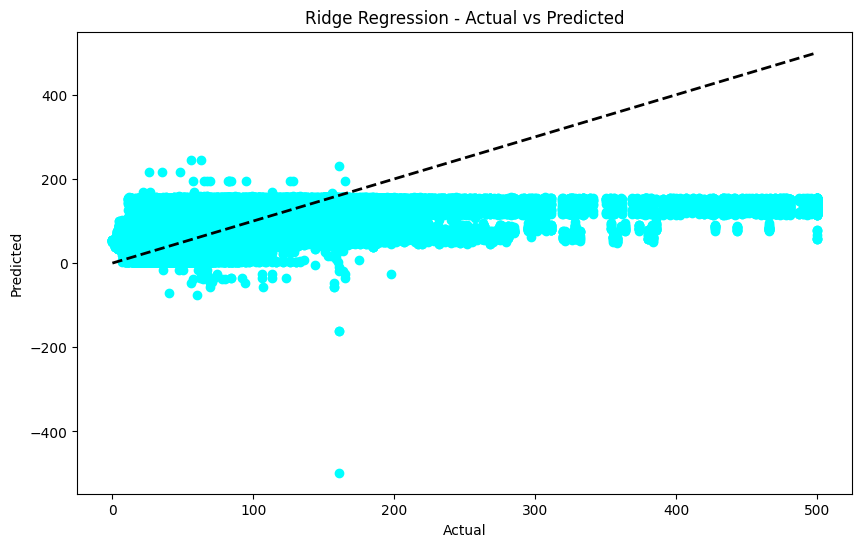

In [44]:
from sklearn.linear_model import Ridge
# Train model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
# Predict
y_pred = ridge_model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='cyan')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression - Actual vs Predicted')
plt.show()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 43.65062615056743
MAE: 26.359103289995048
R-squared: 0.4633444457227409


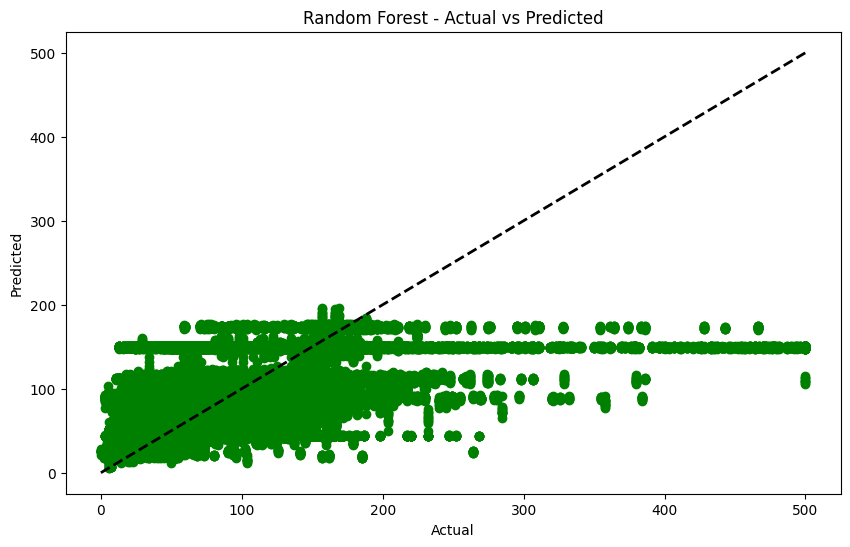

In [45]:
from sklearn.ensemble import RandomForestRegressor

# Train model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest - Actual vs Predicted')
plt.show()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 43.742031648559724
MAE: 26.5266477425706
R-squared: 0.46109455823898315


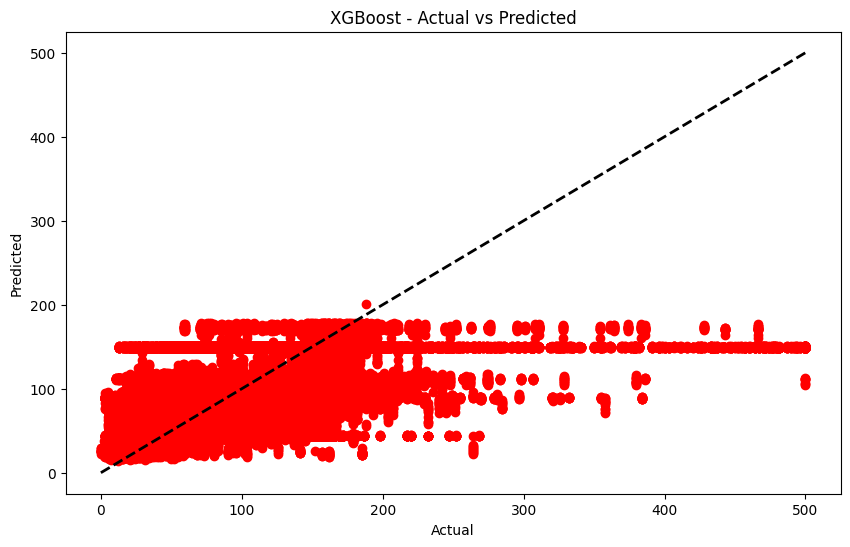

In [46]:
import xgboost as xgb

# Train model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost - Actual vs Predicted')
plt.show()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MLP Regressor - RMSE: 45.77549716426165
MAE: 28.81575716166619
R-squared: 0.4098249947984567


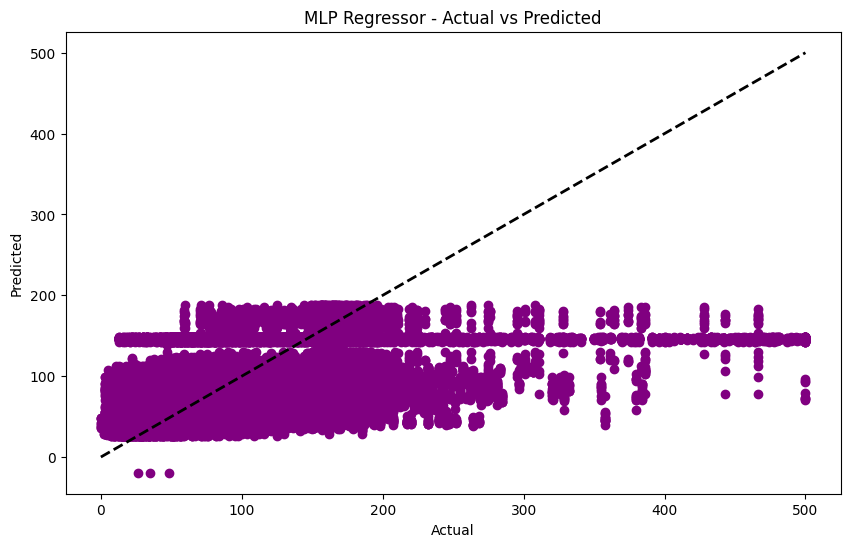

In [47]:
from sklearn.neural_network import MLPRegressor

# Train model
mlp_model = MLPRegressor(random_state=42, max_iter=500)
mlp_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = mlp_model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MLP Regressor - RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('MLP Regressor - Actual vs Predicted')
plt.show()

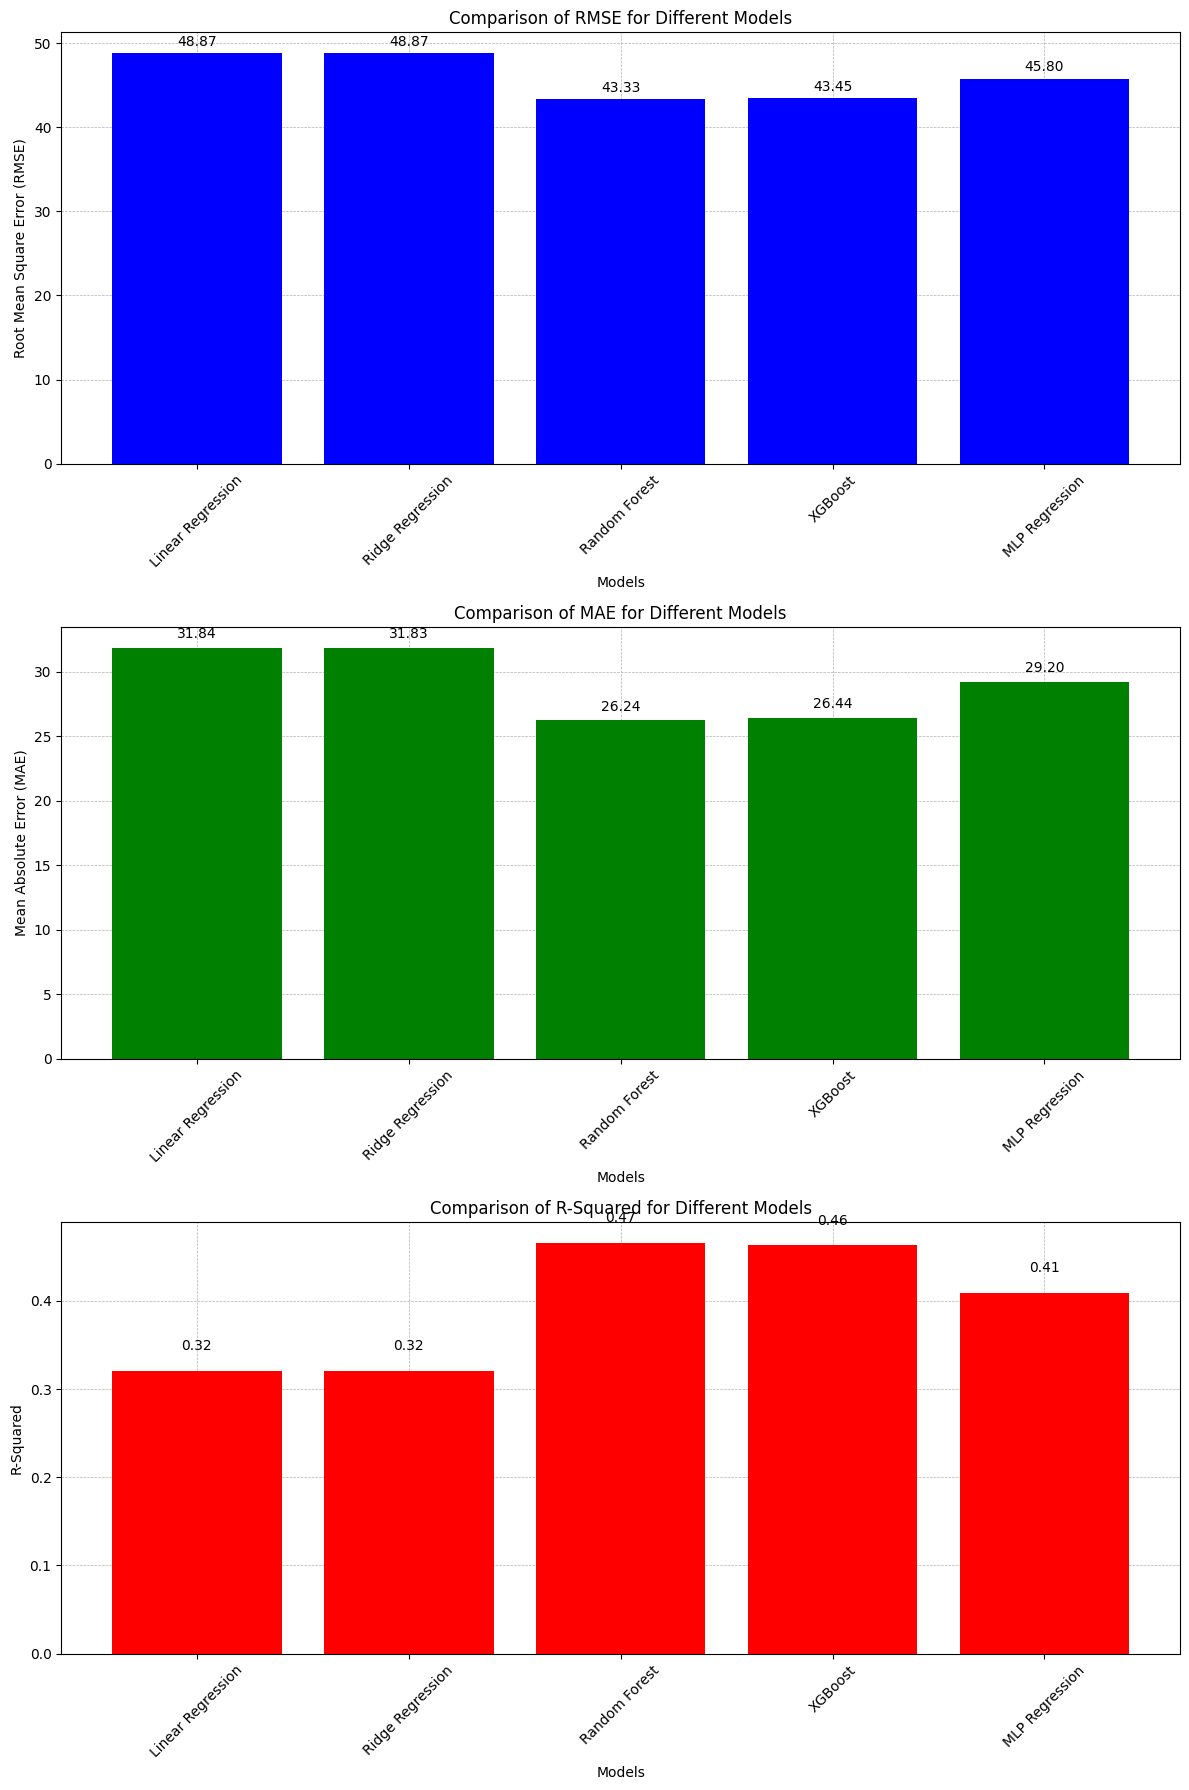

In [48]:
import matplotlib.pyplot as plt

# Updated results for the five models
results = {
    'Linear Regression': {'rmse': 48.86708, 'mae': 31.83798, 'r2': 0.32066},
    'Ridge Regression': {'rmse': 48.86677, 'mae': 31.83385, 'r2': 0.32067},
    'Random Forest': {'rmse': 43.3337, 'mae': 26.23991, 'r2': 0.46579},
    'XGBoost': {'rmse': 43.44512, 'mae': 26.43849, 'r2': 0.46304},
    'MLP Regression': {'rmse': 45.80059, 'mae': 29.20293, 'r2': 0.40918}
}

# Add models and metrics
models = list(results.keys())
rmse_values = [results[model]['rmse'] for model in models]
mae_values = [results[model]['mae'] for model in models]
r2_values = [results[model]['r2'] for model in models]

# Create subplots for RMSE, MAE, and R-Squared
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# RMSE plot
axes[0].bar(models, rmse_values, color='blue')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Root Mean Square Error (RMSE)')
axes[0].set_title('Comparison of RMSE for Different Models')
axes[0].set_xticks(range(len(models)))
axes[0].set_xticklabels(models, rotation=45)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[0].set_axisbelow(True)
for i in range(len(models)):
    axes[0].text(i, rmse_values[i] + 0.5, f'{rmse_values[i]:.2f}', ha='center', va='bottom')

# MAE plot
axes[1].bar(models, mae_values, color='green')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Mean Absolute Error (MAE)')
axes[1].set_title('Comparison of MAE for Different Models')
axes[1].set_xticks(range(len(models)))
axes[1].set_xticklabels(models, rotation=45)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].set_axisbelow(True)
for i in range(len(models)):
    axes[1].text(i, mae_values[i] + 0.5, f'{mae_values[i]:.2f}', ha='center', va='bottom')

# R-Squared plot
axes[2].bar(models, r2_values, color='red')
axes[2].set_xlabel('Models')
axes[2].set_ylabel('R-Squared')
axes[2].set_title('Comparison of R-Squared for Different Models')
axes[2].set_xticks(range(len(models)))
axes[2].set_xticklabels(models, rotation=45)
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[2].set_axisbelow(True)
for i in range(len(models)):
    axes[2].text(i, r2_values[i] + 0.02, f'{r2_values[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


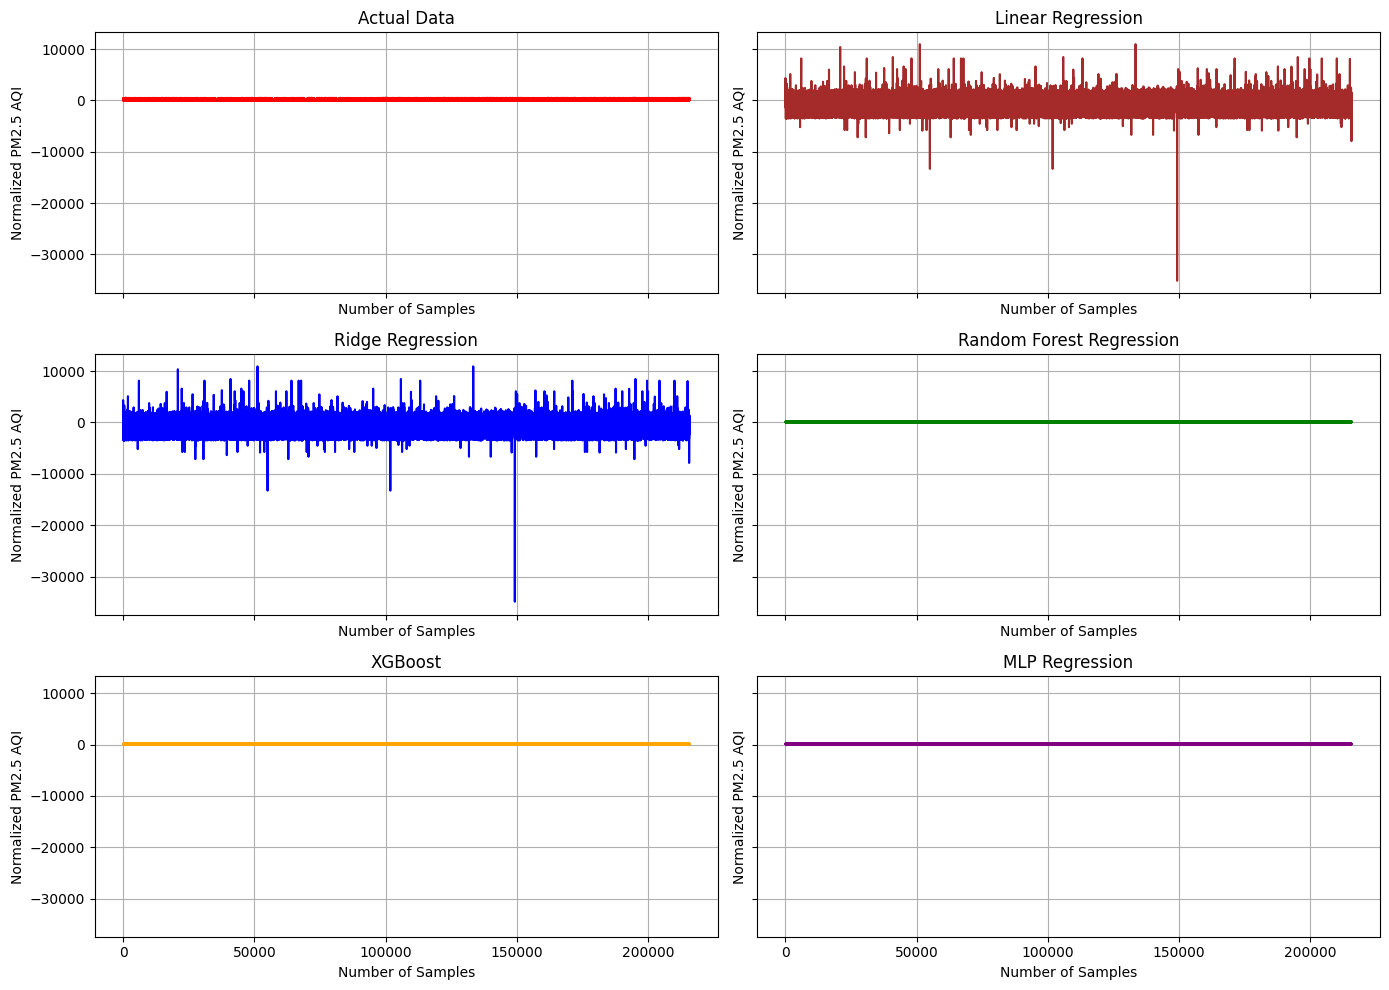

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming predictions from the models (replace these with actual predictions)
# Replace the following dummy data with your actual prediction results
num_samples = len(y_test)  # Use the length of your test set
actual_data = y_test.values

# Dummy predictions (replace with actual predictions)
linear_regression_pred = linear_model.predict(X_test_scaled)
ridge_regression_pred = ridge_model.predict(X_test_scaled)
random_forest_pred = rf_model.predict(X_test)
xgboost_pred = xgb_model.predict(X_test)
mlp_regressor_pred = mlp_model.predict(X_test_scaled)

# Creating the plots
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True, sharey=True)

# Plot actual data
axes[0, 0].plot(actual_data, color='red')
axes[0, 0].set_title('Actual Data')

# Plot Linear Regression results
axes[0, 1].plot(linear_regression_pred, color='brown')
axes[0, 1].set_title('Linear Regression')

# Plot Ridge Regression results
axes[1, 0].plot(ridge_regression_pred, color='blue')
axes[1, 0].set_title('Ridge Regression')

# Plot Random Forest results
axes[1, 1].plot(random_forest_pred, color='green')
axes[1, 1].set_title('Random Forest Regression')

# Plot XGBoost results
axes[2, 0].plot(xgboost_pred, color='orange')
axes[2, 0].set_title('XGBoost')

# Plot MLP Regression results
axes[2, 1].plot(mlp_regressor_pred, color='purple')
axes[2, 1].set_title('MLP Regression')

# Setting labels
for ax in axes.flat:
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel('Normalized PM2.5 AQI')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [49]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense

# # Reshape data for LSTM (samples, timesteps, features)
# X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
# X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# # Build LSTM model
# model = Sequential()
# model.add(LSTM(50, input_shape=(1, X_train_scaled.shape[2])))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train model
# model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# # Predict and evaluate
# y_pred = model.predict(X_test_scaled)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'LSTM Regressor - RMSE: {rmse}')
# print(f'MAE: {mae}')
# print(f'R-squared: {r2}')

# # Visualization
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, color='orange')
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('LSTM Regressor - Actual vs Predicted')
# plt.show()
